# COVID-19 Clinical Trials EDA

#### Converting XML files to dataframe

In [183]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os
from xml.etree import ElementTree


In [184]:
list_of_files = os.listdir(r'C:\Users\Karthik\Desktop\dataset\COVID Clinical Trials\COVID-19 CLinical trials studies\COVID-19 CLinical trials studies')

print("Total number of files: ",len(list_of_files))

Total number of files:  5783


In [11]:
list_of_files[0]

'NCT00571389.xml'

In [185]:
df_covid = pd.DataFrame()
df = pd.DataFrame()
i=0
list_keywords=[]
path = r'C:\Users\Karthik\Desktop\dataset\COVID Clinical Trials\COVID-19 CLinical trials studies\COVID-19 CLinical trials studies\\'

for file in list_of_files:
    file_path=path+file
    tree = ElementTree.parse(file_path)
    root = tree.getroot()

    trial = {}

    trial['id'] = root.find('id_info').find('nct_id').text
    trial['overall_status'] = root.find('overall_status').text
    trial['study_type'] = root.find('study_type').text
    
    if root.find('start_date') != None:
        trial['start_date'] = root.find('start_date').text
    else:
         trial['start_date'] = ''
            
            
    if root.find('enrollment') != None:
        trial['enrollment'] = root.find('enrollment').text
    else:
         trial['enrollment'] = ''

    trial['condition'] = root.find('condition').text.upper().replace('CORONAVIRUS INFECTIONS','CORONAVIRUS INFECTION').replace('CORONA VIRUS INFECTION','CORONAVIRUS INFECTION').replace('SARS-COV-2','SARS-COV2').replace('SARS-COV 2','SARS-COV2').replace('COVID-19','COVID').replace('COVID19','COVID').replace('COVID 19','COVID')
    if root.find('location_countries') != None:
        trial['location_countries'] = root.find('location_countries').find('country').text.upper()
    else:
        trial['location_countries'] = ''
        
    if root.find('intervention') != None:
        trial['intervention'] = root.find('intervention').find('intervention_name').text.upper()
    else:
        trial['intervention'] = ''
        
    for entry in root.findall('keyword'):
        list_keywords.append(entry.text)

    if root.find('official_title') == None:
        trial['title'] = root.find('brief_title').text
    else:
        trial['title'] = root.find('official_title').text

    date_string = root.find('required_header').find('download_date').text
    trial['date_processed'] = date_string.replace('ClinicalTrials.gov processed this data on ', '')
    
    trial['sponsors'] = root.find('sponsors').find('lead_sponsor').find('agency').text
    
    
    df  = pd.DataFrame(trial,index=[i])
    i=i+1
    
    df_covid = pd.concat([df_covid, df])

In [186]:
df_covid.head()

,id,overall_status,study_type,start_date,enrollment,condition,location_countries,intervention,title,date_processed,sponsors
0,NCT00571389,Recruiting,Observational,November 2007,1000,"SOLID TUMOR, ADULT",UNITED STATES,,A Study to Facilitate Development of an Ex-Viv...,"April 14, 2021","BioCytics, Inc."
1,NCT01087333,Recruiting,Observational,"March 2, 2010",1263,HAIRY CELL LEUKEMIA (HCL),UNITED STATES,,Collection of Human Samples to Study Hairy Cel...,"April 14, 2021",National Cancer Institute (NCI)
2,NCT01134172,"Active, not recruiting",Observational,May 2010,935,BREAST CANCER,UNITED STATES,SURVEY WEB-BASED OR TELEPHONE INTERVIEW,Breast Cancer and the Workforce: Ethnic Differ...,"April 14, 2021",Memorial Sloan Kettering Cancer Center
3,NCT01306084,Recruiting,Observational,"March 15, 2011",1000,ANOGENITAL HERPES,UNITED STATES,,Viral Infections in Healthy and Immunocompromi...,"April 14, 2021",National Institute of Allergy and Infectious D...
4,NCT01435018,Completed,Interventional,"October 1, 2013",334,HIV-1 INFECTION,BRAZIL,ETOPOSIDE (ET),A Randomized Comparison of Three Regimens of C...,"April 14, 2021",AIDS Clinical Trials Group


In [187]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5783 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  5783 non-null   object
 1   overall_status      5783 non-null   object
 2   study_type          5783 non-null   object
 3   start_date          5783 non-null   object
 4   enrollment          5783 non-null   object
 5   condition           5783 non-null   object
 6   location_countries  5783 non-null   object
 7   intervention        5783 non-null   object
 8   title               5783 non-null   object
 9   date_processed      5783 non-null   object
 10  sponsors            5783 non-null   object
dtypes: object(11)
memory usage: 542.2+ KB


<AxesSubplot:title={'center':'Count of overall status'}, ylabel='Count'>

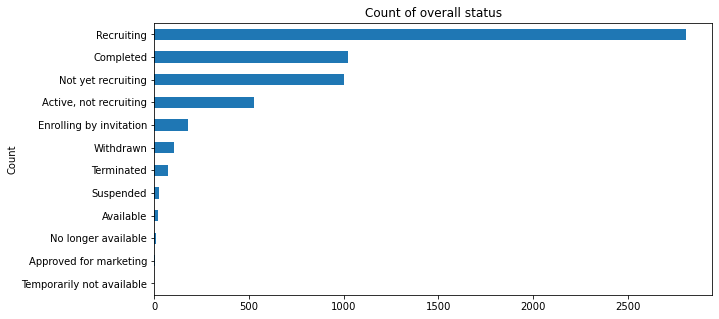

In [188]:
import seaborn as sns

df_covid['overall_status'].value_counts().sort_values().plot(kind='barh', figsize=(10,5), xlabel='Count', title='Count of overall status')


[]

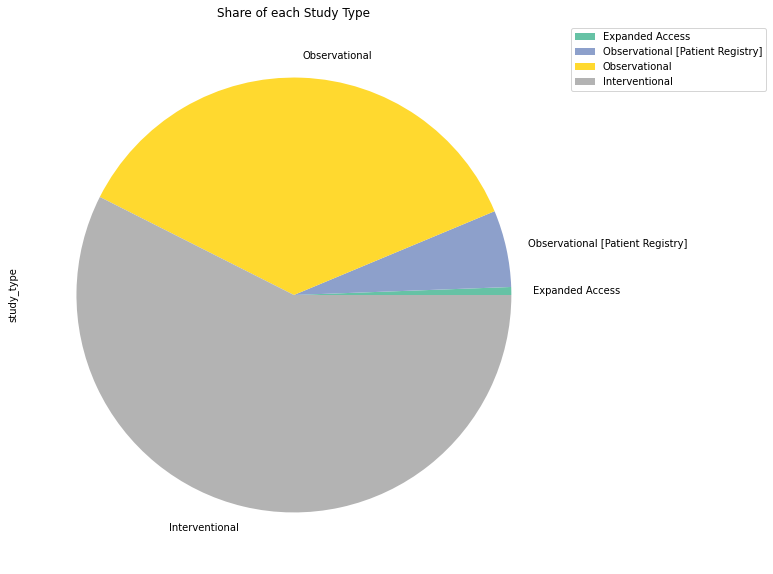

In [189]:
ax = df_covid['study_type'].value_counts().sort_values().plot(kind='pie', figsize=(20,10), colormap='Set2', title='Share of each Study Type')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

<AxesSubplot:title={'center':'Top 5 Drugs tested'}>

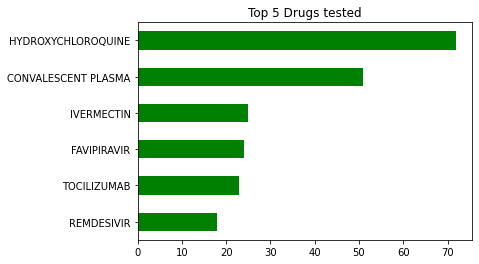

In [190]:
interventions = df_covid[df_covid['study_type']=='Interventional']
interventions['intervention'].value_counts().head(6).sort_values().plot(kind='barh', color='g', title='Top 5 Drugs tested')

<AxesSubplot:title={'center':'Top Countries where clinical trials where conducted'}>

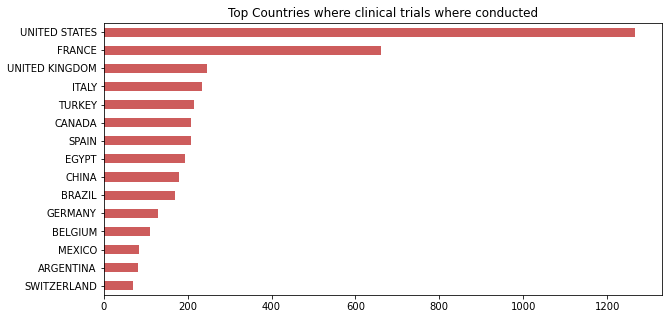

In [191]:
countries = df_covid[df_covid['location_countries']!='']
countries['location_countries'].value_counts().head(15).sort_values().plot(kind='barh', color='indianred', figsize=(10,5), title='Top Countries where clinical trials where conducted')

<AxesSubplot:title={'center':'Top 10 Sponsors'}>

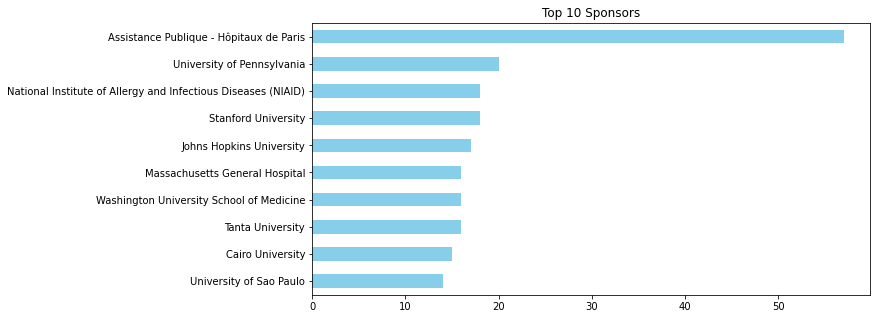

In [192]:
interventions['sponsors'].value_counts().head(10).sort_values().plot(kind='barh',color='skyblue', figsize=(10,5), title='Top 10 Sponsors')

<ipython-input-193-b5ca68fb0475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interventions['enrollment'] = interventions['enrollment'].astype('int64')
<ipython-input-193-b5ca68fb0475>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollment['Category'] = categories


<AxesSubplot:title={'center':'Size of Interventional Trials'}>

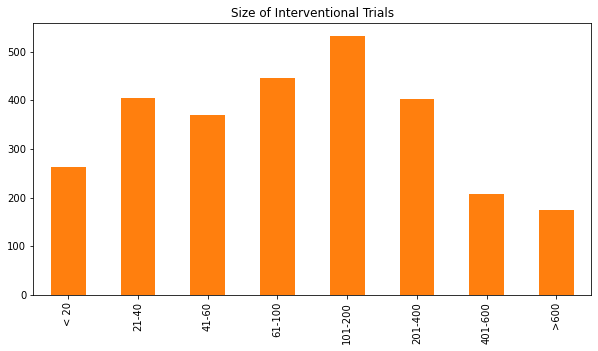

In [193]:
interventions['enrollment'] = interventions['enrollment'].astype('int64')

enrollment = interventions.loc[
 (interventions['overall_status'] != 'Withdrawn') & (interventions['overall_status'] != 'Terminated')]
bins = [-1, 20, 40, 60, 100, 200, 400, 600, 1000]
group_names = ['< 20', '21-40', '41-60', '61-100', '101-200', '201-400', '401-600', '>600']
categories = pd.cut(enrollment['enrollment'], bins, labels=group_names)

enrollment['Category'] = categories
# View value counts
enrollment_counts = enrollment['Category'].value_counts().sort_index(ascending=True)
enrollment_counts.plot(kind="bar",color='tab:orange', figsize=(10,5), title='Size of Interventional Trials')

In [194]:
trials = pd.read_csv(r'C:\Users\Karthik\Desktop\dataset\COVID Clinical Trials\COVID clinical trials.csv')

[]

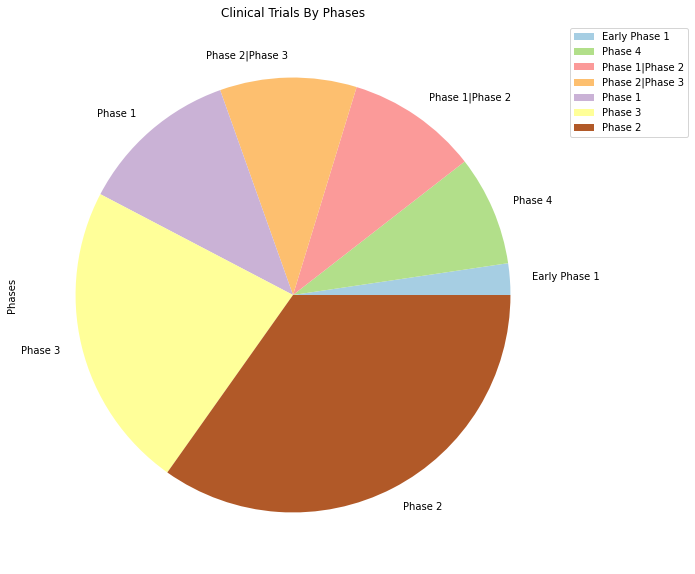

In [195]:
trials.drop(trials.index[trials['Phases']=='Not Applicable'], inplace=True)
ax = trials['Phases'].value_counts().sort_values().plot(kind='pie', figsize=(20,10), colormap='Paired', title='Clinical Trials By Phases')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()